## Import the needed libraries

In [1]:
import json
import math
import copy
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import animation

## Task 1/5: Setting up the modeling environment

### 1. Basic visualization.

In [2]:
basic_scenario = {
    "width": 6,
    "height": 6,
    "cell_size": 1,
    "pedestrian_coordinates": [{"x":1, "y":2}, {"x":2,"y":5}],
    "obstacle_coordinates":[{"x":3, "y":2}],
    "target_coordinates":[{"x":5, "y":4}],
}

In [3]:
state_space = {
    "E": 0,
    "P":1,
    "O":2,
    "T":3,
}

In [4]:
# ### The reason why we need this class: 
# ### when writing the automaten class, we will need scenario_setting data again.
# class Scenario_data:
#     def __init__(self, scenario_setting)
#         self.width = scenario_setting["width"]
#         self.height = scenario_setting["height"]
#         self.cell_size = scenario_setting["cell_size"]
#         self.ped_coordinates = scenario_setting["pedestrian_coordinates"]
#         self.obs_coordinates = scenario_setting["obstacle_coordinates"]
#         self.tar_coordinates = scenario_setting["target_coordinates"]

In [5]:
class Scenario: 
    """"""
    def __init__(self, scenario_setting):
        #preprocess the json data to create basic information for grid visualization and simulation
        self.number_of_cells_x = math.floor(scenario_setting["width"]/scenario_setting["cell_size"])
        self.number_of_cells_y = math.floor(scenario_setting["height"]/scenario_setting["cell_size"])
        self.ped_coordinates = scenario_setting["pedestrian_coordinates"]
        self.obs_coordinates = scenario_setting["obstacle_coordinates"]
        self.tar_coordinates = scenario_setting["target_coordinates"]
        
        #basic attribute of a scenario
        self.states = np.zeros((self.number_of_cells_y, self.number_of_cells_x))
        
        #list of pedestrian, target, obstacle position
        self.ped_coordinates_list = []
        self.obs_coordinates_list = []
        self.tar_coordinates_list = []
        
    def add_pedestrians(self):
        """"""# get the list of pedestrain positions from the scenario_setting file (json)
        for ped in self.ped_coordinates:
            if  (ped["x"]-1, ped["y"]-1) not in self.ped_coordinates_list:
                self.ped_coordinates_list.append(  (ped["x"]-1,ped["y"]-1) )
                self.states[ped["x"]-1, ped["y"]-1] = state_space["P"]
            
    def add_obstacles(self):
        """"""
        for obs in self.obs_coordinates:
            if  (obs["x"]-1, obs["y"]-1) not in self.obs_coordinates_list:
                self.obs_coordinates_list.append(  (obs["x"]-1,obs["y"]-1) )
                self.states[obs["x"]-1, obs["y"]-1] = state_space["O"]
            
    def add_targets(self):    
        """"""
        for tar in self.tar_coordinates:
            if  (tar["x"]-1, tar["y"]-1) not in self.tar_coordinates_list:
                self.tar_coordinates_list.append(  (tar["x"]-1,tar["y"]-1) )
                self.states[tar["x"]-1, tar["y"]-1] = state_space["T"]
    

In [6]:
scenario = Scenario(basic_scenario)

In [7]:
scenario.add_pedestrians()
scenario.add_obstacles()
scenario.add_targets()

In [8]:
scenario_copy = copy.copy(scenario.states)
scenario.states

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [9]:
def get_color_map():    
    cmap = colors.ListedColormap(['white', 'blue', 'red', 'green']) 
    #colors represent empty, pedestrian, obstacle, target respectively
    #bounds = [state_space["empty"], state_space["pedestrian"], state_space["obstacle"], state_space["target"]]
    #colors.BoundaryNorm(bounds, cmap.N)
    return cmap

In [10]:
def get_text(states, ax):
    for (i,j), state in np.ndenumerate(states): 
        if state == state_space["P"]:
            ax.text(j, i, "P", ha='center', va='center')
        if state == state_space["O"]:
            ax.text(j, i, "O", ha='center', va='center')
        if state == state_space["T"]:
            ax.text(j, i, "T", ha='center', va='center')    

In [11]:
def get_grid(states, ax):
    ax.tick_params(bottom=False, top=False, left=False, right=False, 
                   labelbottom=False, labelleft=False, labelright=False, labeltop=False )
    ax.set_xticks(np.arange(-.5, states.shape[1], 1))
    ax.set_yticks(np.arange(-.5, states.shape[0], 1))
    ax.grid(which='major', color='gray', linestyle='-', linewidth=2)

In [12]:
def get_plot_states(states):
    ##The method that combines get_color_map(), get_text(), get_grid() together and visualize the states
    #add basic figure
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    #add color
    ax.matshow(states, cmap=get_color_map())
    #add text, e.g. 
    get_text(states, ax)
    #remove labels and add grid
    get_grid(states, ax)

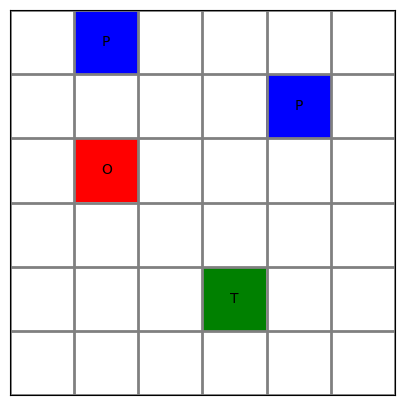

In [13]:
get_plot_states(scenario.states)

In [14]:
def euclidean_distance(i,j,k,l):
        return np.sqrt(   (i-k)**2 + (j-l)**2  )  #*self.scenario.number_of_cells_y

In [15]:
def cost_func(r, rmax):
    if r < rmax:
        return np.exp(1 / (r**2-rmax**2))
    else:
        return 0

In [16]:
scenario.ped_coordinates_list, scenario.tar_coordinates_list,scenario.obs_coordinates_list

([(0, 1), (1, 4)], [(4, 3)], [(2, 1)])

In [17]:
distances = np.zeros((scenario.number_of_cells_y, scenario.number_of_cells_x))

In [18]:
k,l = scenario.tar_coordinates_list[0]
#calculate distance to the target for each cell in the grid
for i in range(scenario.number_of_cells_y):
    for j in range(scenario.number_of_cells_x):
        distances[i,j] = euclidean_distance(i,j,k,l)
#set the obstacle to unlimited large
for obs in scenario.obs_coordinates_list:
    distances[obs] = 1000000
        

In [71]:
scenario = Scenario(basic_scenario)
scenario.add_pedestrians()
scenario.add_obstacles()
scenario.add_targets()
scenario.states

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [72]:
class Automaton:
    """class to calculate distances, utilities and move the pedestrian"""
    def __init__ (self, scenario):
        self.scenario = scenario
        
        self.distances = np.zeros((scenario.number_of_cells_y, scenario.number_of_cells_x))
        self.utility = np.zeros((scenario.number_of_cells_y, scenario.number_of_cells_x))
        
    def euclidean_distance(self,i,j,k,l):
        return np.sqrt(   (i-k)**2 + (j-l)**2  )  #*self.scenario.number_of_cells_  
    
    def on_grid(self, i, j):
        return -1 < i < self.scenario.number_of_cells_y and -1 < j < self.scenario.number_of_cells_x
    
    def reset_pedestrians_positions(self, ped_next_step):
        #set the current value to 0
        for ped in self.scenario.ped_coordinates_list:
            self.scenario.states[ped[0], ped[1]] = state_space["E"]   
            self.scenario.ped_coordinates_list = []
            
        #set the value of the next step    
        for ped in ped_next_step:
            self.scenario.states[ped[0], ped[1]] = state_space["P"]   
            self.scenario.ped_coordinates_list.append(ped)
    
    def move_pedestrians(self):
        neighbour_offsets = [ [-1,0], [0,1], [1,0], [0,-1], [1, 1], [-1, -1], [-1, 1], [1, -1] ]
        #     here diagonal is probabily needed ?
        
        ped_next_step = []
        for ped in self.scenario.ped_coordinates_list:
            min_distance = 1000
            print(ped)
            for neighbour_offset in neighbour_offsets:
                neighbour = np.add ([ ped[0],ped[1] ], neighbour_offset)
                if  ( self.on_grid(neighbour[0], neighbour[1]) & (distances[neighbour[0],neighbour[1]]<min_distance) ).all(): 
                    #cell is on grid and pick the minimun distance
                    neighbour_selected = neighbour
                    min_distance = distances[neighbour[0], neighbour[1]]   
            ped_next_step.append(neighbour_selected)
            print(ped_next_step)
            
        self.reset_pedestrians_positions(ped_next_step)
        

In [73]:
automaton = Automaton(scenario)

In [74]:
def simulation_multiple_steps(timesteps = None):
    """"""
    reach_target = False
    data_scenario_states = []

    if timesteps == None:
        timesteps = scenario.number_of_cells_y * scenario.number_of_cells_x
    for k in range(timesteps):
        data_scenario_states.append(np.copy(scenario.states))
        # check whether all pedestrians reach targets
        if k == 0:
            automaton.move_pedestrians()
        elif ((scenario.states == data_scenario_states[-2]) & (k>=1)).all():
            print("Simulation stopped after", k + 1 ,"simulation steps, since all pedestrians are already at their target.")
            break
        else:
            automaton.move_pedestrians()

    print("Finished simulating", k + 1 ,"simulation steps.")

    return data_scenario_states
        

In [76]:
simulation_scenario_states = simulation_multiple_steps()
simulation_scenario_states 

(0, 1)
[array([1, 2])]
(1, 4)
[array([1, 2]), array([2, 3])]
[1 2]
[array([2, 3])]
[2 3]
[array([2, 3]), array([3, 3])]
[2 3]
[array([3, 3])]
[3 3]
[array([3, 3]), array([4, 3])]
[3 3]
[array([4, 3])]
[4 3]
[array([4, 3]), array([3, 3])]
Simulation stopped after 5 simulation steps, since all pedestrians are already at their target.
Finished simulating 5 simulation steps.


[array([[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
      

In [77]:
def get_plot_all_simulation_states(simulation_scenario_states, scenario):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    plot = plt.matshow(simulation_scenario_states[0], fignum=0, cmap=get_color_map())
    add_grid_and_remove_ticks(data[0], ax)
    ...
    

In [25]:
a = [1,2]
a = []
a

[]